In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import re
%matplotlib inline

In [2]:
import pandas,rpy2


In [3]:
%%R
5+3

ERROR: Cell magic `%%R` not found.


In [3]:
df_numerical_train = pd.read_pickle('./data/stores/df_numerical_train.pkl')

# Correlation Matrix Heat Map

In [4]:
df_corr_num = df_numerical_train.set_index('Id').corr()

In [56]:
df_corr_num_ = df_corr_num.iloc[:-1,:-1].fillna(0)

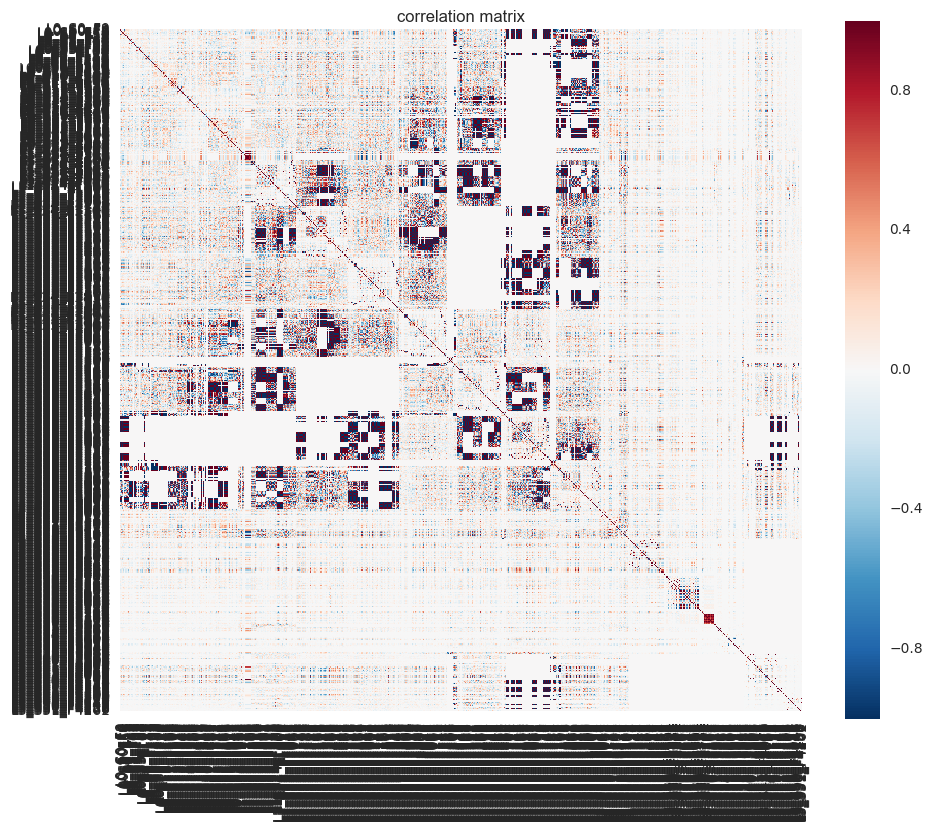

In [112]:
import seaborn as sns
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr_num_, ax=ax, square=True)
ax.set_title('correlation matrix')

In [111]:
df_cov_num = df_numerical_train.set_index('Id').cov()

In [117]:
df_cov_num_ = df_cov_num.iloc[:-1,:-1].fillna(0)

In [118]:
eig_vals, eig_vecs = np.linalg.eig(df_cov_num_.as_matrix())

In [119]:
var = pow(sum(eig_vals),2)

In [125]:
import seaborn.apionly as sns
sns.reset_orig()

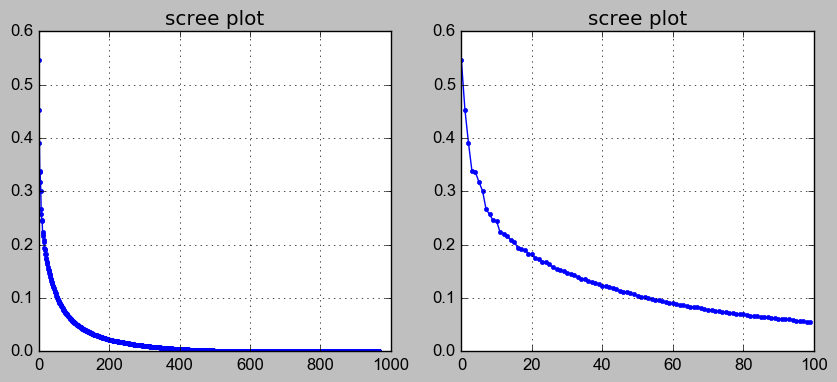

In [147]:
from matplotlib import gridspec

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 2)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])

y=(sorted(np.abs(eig_vals), reverse=True) / var) * 100
ax1.plot(range(len(y)), y, ls='-', marker='.')
ax1.grid()
ax1.set_title('scree plot')

ax2.plot(range(len(y[:100])), y[:100], ls='-', marker='.')
ax2.grid()
ax2.set_title('scree plot')